# Goal Definition

# Importing Essential Libraries

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import auc
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.losses import binary_crossentropy
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Input
# from tensorflow.keras.layers import Activation
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



# Loading Dataset

In [287]:
# Loading dataset

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset before encoding will be assigned the variable (df_be)

In [288]:
#  Reading Dataset and displaying first 5 rows
df_be = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project/health_dataset.csv')
df_be.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Preprocessing

Dropping the unnecessary columns i.e Patient ID

In [289]:
df_be.drop(['id'], axis=1, inplace=True)

In [290]:
gender_counts = df_be['gender'].value_counts()
total_entries = len(df_be)
gender_percentages = (gender_counts / total_entries) * 100

print("Gender Percentages:")
print(gender_percentages)

Gender Percentages:
gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: count, dtype: float64


In [291]:
gender_counts

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [292]:
df_be[df_be['gender']== 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


We can see that the there is only one case of gender identified as (other), and it is  not labeled as stroke, in this case this instance is insignificant and best to be dropped to avoid having a designated category only for (other) when perfoming encoding

In [293]:
df_be.drop(df_be[df_be['gender']== 'Other'].index,inplace= True)
df_be.shape

(5109, 11)

In [294]:
df_be.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


Exploring missing values

In [295]:
df_be.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [296]:
ratio_of_missing_data =(df_be["bmi"].isnull().sum() / df_be.shape[0]) * 100
print("Ratio of Missing Data",(ratio_of_missing_data),'%')


Ratio of Missing Data 3.9342337052260716 %


Missing bmi values represent almost 4% of the dataset, so based on the data size 5000+, we will not drop missing values in the bmi column

## Dealing with Missing Data, using Median

In [297]:
# drop the missing values
df_be.dropna(subset=['bmi'], inplace=True)

In [298]:
# median_bmi =df_be['bmi'].median()
# df_be['bmi'].fillna(median_bmi, inplace =True)

Checking data frame to confirm abscence of null data

In [299]:
df_be.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Dicovering data counts and distributions

In [300]:
df_be['stroke'].value_counts()

stroke
0    4699
1     209
Name: count, dtype: int64

The distribution analysis of the two classes above indicate that this dataset is imbalanced as only 249 cases out of 5000+ samples are labelled as stroke. Therefore, we will need to apply techniques to balance the dataset prior to model development.

In [301]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status', 'stroke']
numerical_features = [ 'age', 'avg_glucose_level', 'bmi']

## Exploratory Data Analysis

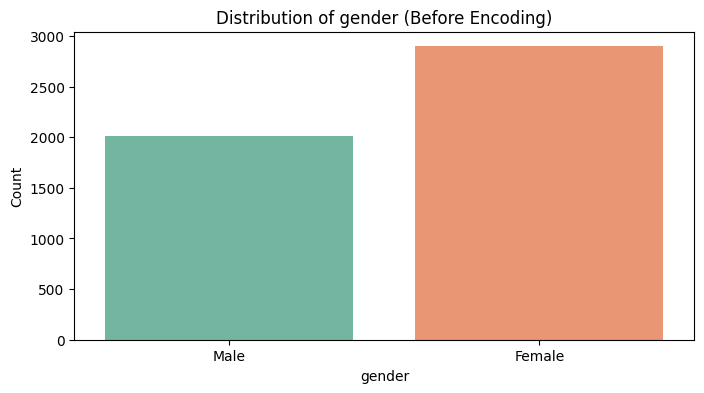

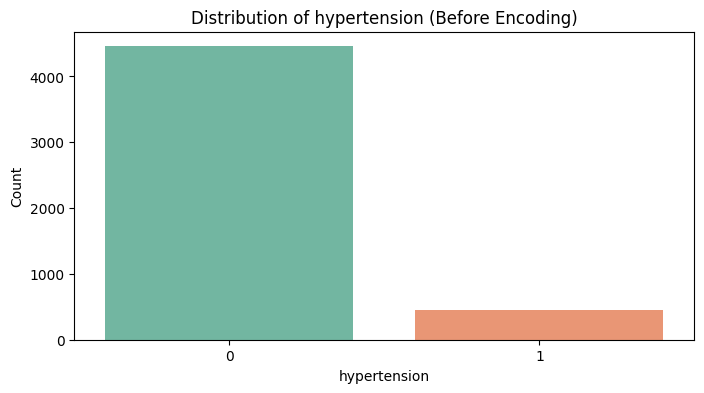

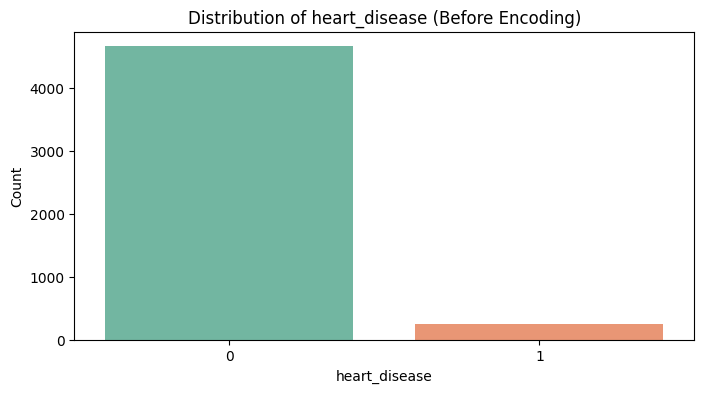

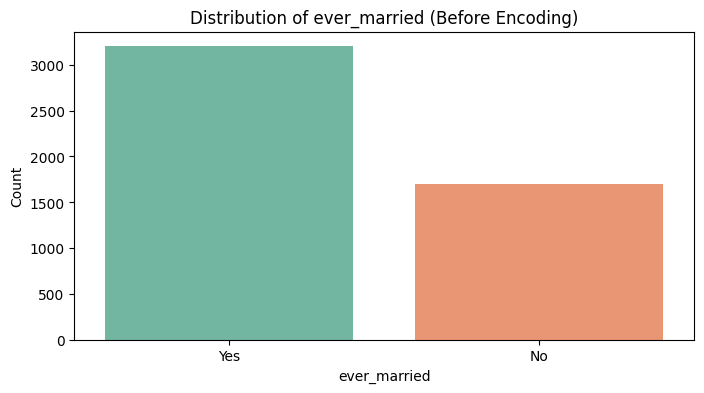

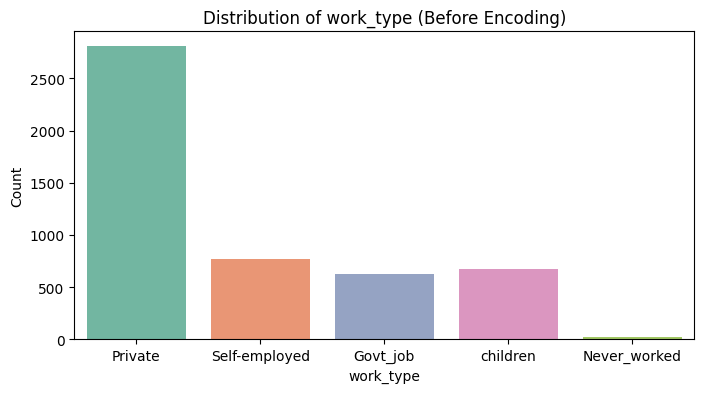

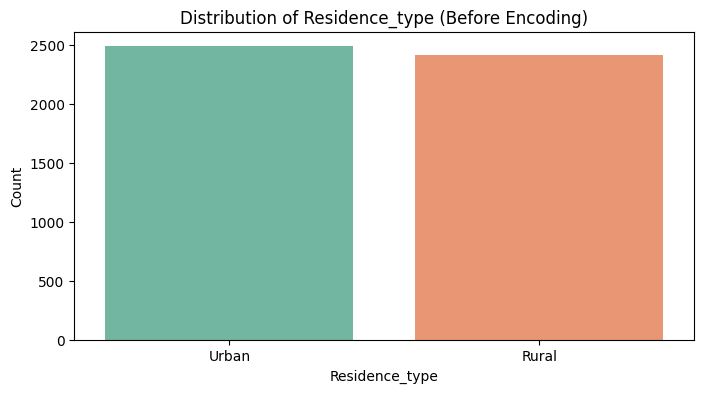

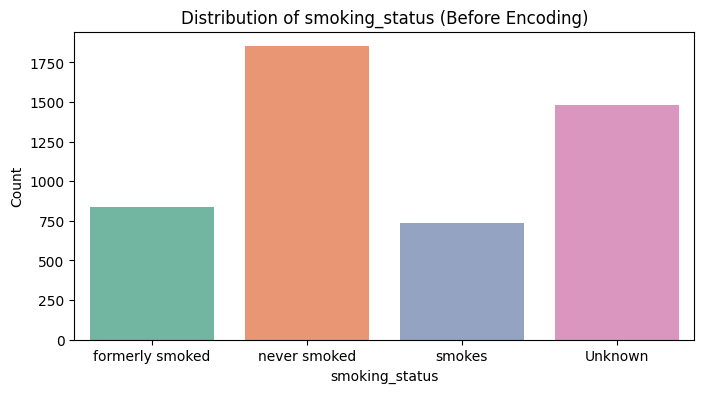

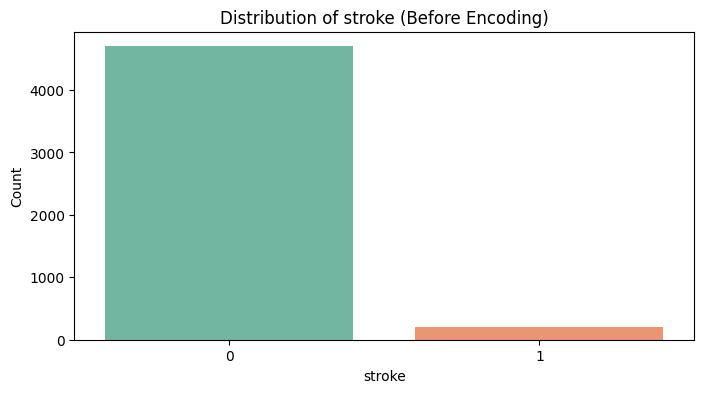

In [302]:
for feature in categorical_features:
   plt.figure(figsize=(8, 4))
   sns.countplot(data=df_be, x=feature, palette='Set2')
   plt.title(f'Distribution of {feature} (Before Encoding)')
   plt.xlabel(feature)
   plt.ylabel('Count')

   plt.show()

Distribution of categorical features using pie chart and percentage of occurrences

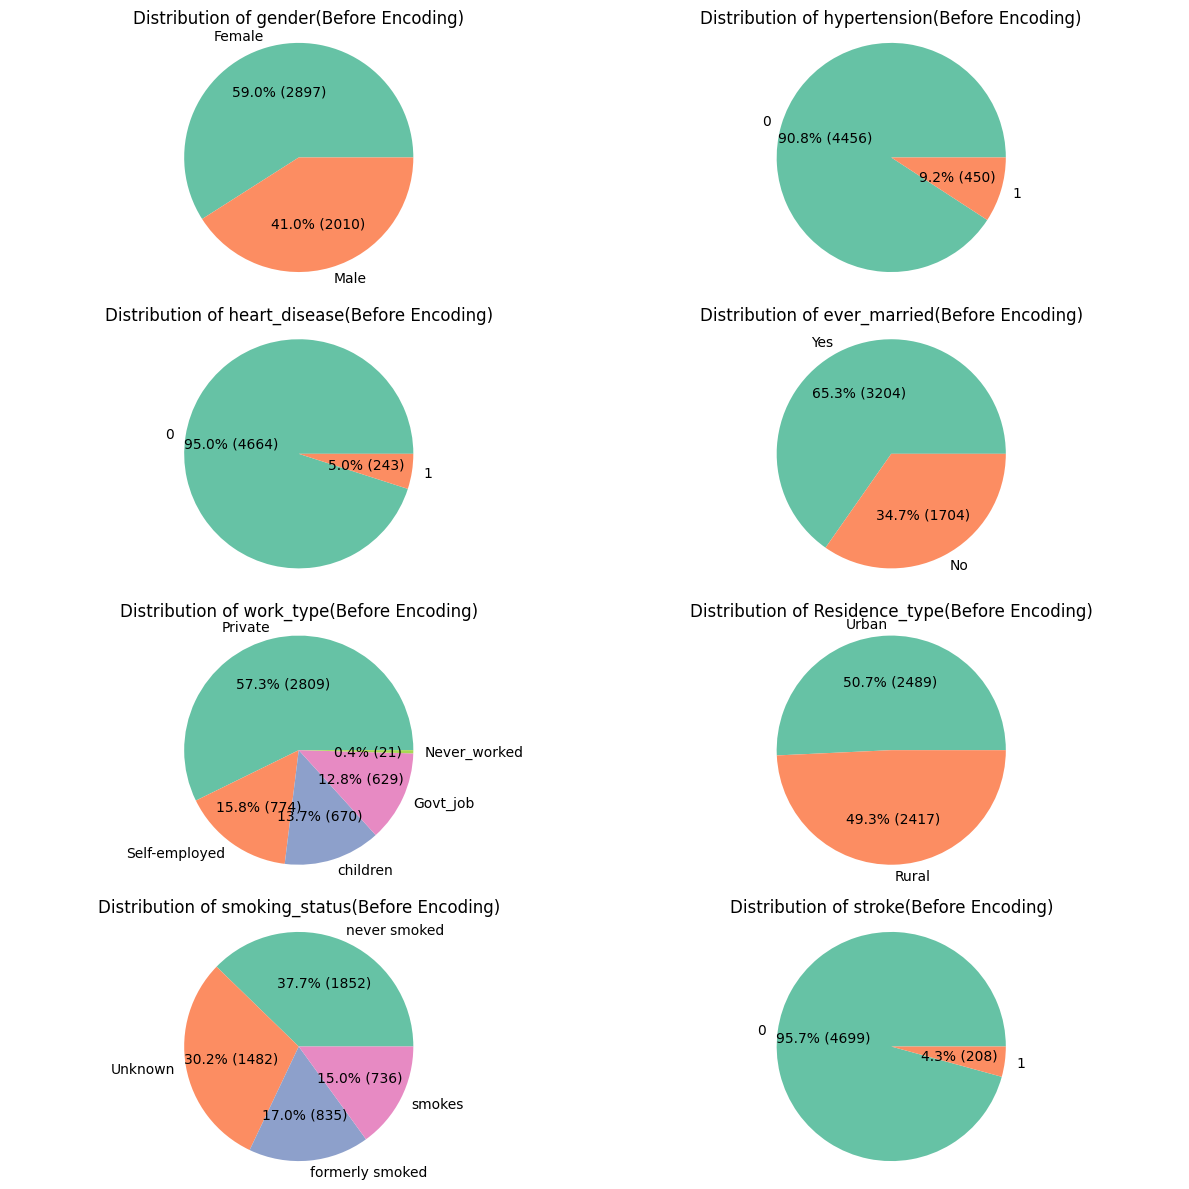

In [303]:
num_rows = 4
num_cols = 2
total_plots = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for idx, feature in enumerate(categorical_features[:total_plots]):
    row = idx // num_cols
    col = idx % num_cols

    category_counts = df_be[feature].value_counts()

    axes[row, col].pie(category_counts, labels=category_counts.index, autopct=lambda pct: f"{pct:.1f}% ({int(pct * sum(category_counts)/100)})",colors=sns.color_palette('Set2', len(category_counts)))
    axes[row, col].set_title(f'Distribution of {feature}(Before Encoding)')
    axes[row, col].axis('equal')

plt.tight_layout()
plt.show()


Distribution of features - numerical features

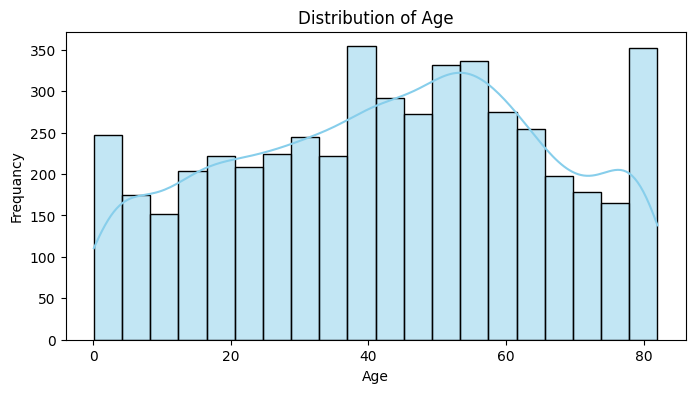

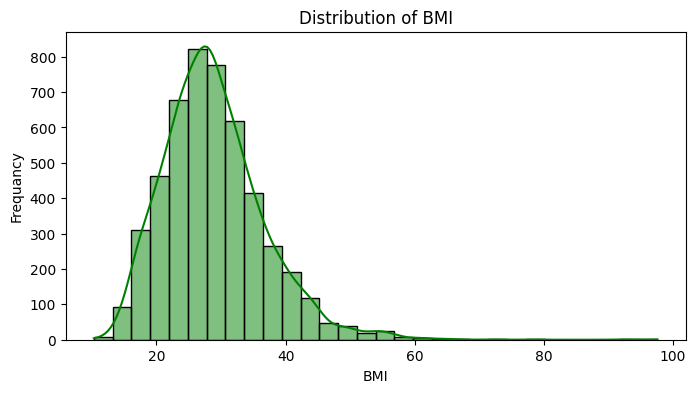

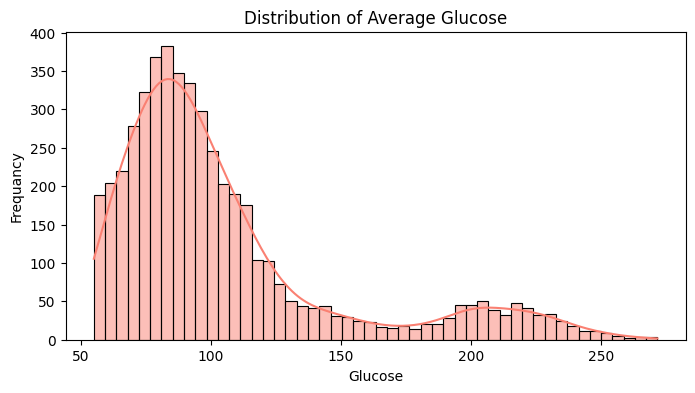

In [304]:
plt.figure(figsize=(8,4))
sns.histplot(df_be['age'],bins=20, kde= True, color='skyblue' )
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequancy')
plt.show()
plt.figure(figsize=(8,4))
sns.histplot(df_be['bmi'],bins=30, kde= True, color='green' )
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequancy')
plt.show()
plt.figure(figsize=(8,4))
sns.histplot(df_be['avg_glucose_level'],bins=50, kde= True, color='salmon' )
plt.title('Distribution of Average Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequancy')
plt.show()

Distribution of numerical features by output 'stroke'

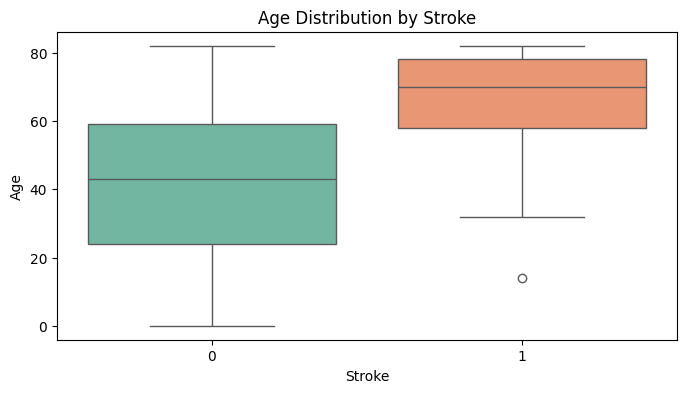

In [305]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_be, x='stroke', y='age', palette='Set2')
plt.title('Age Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

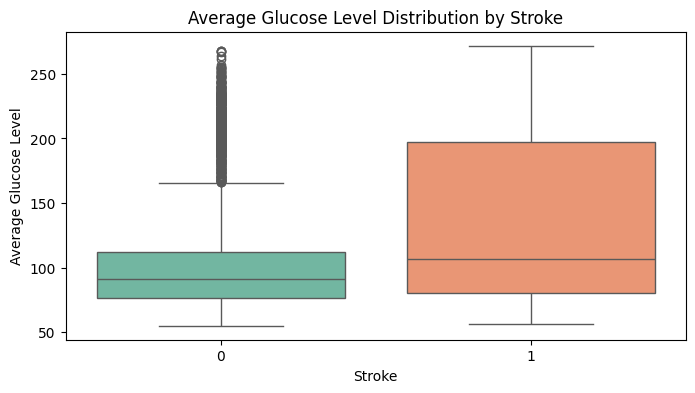

In [306]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_be, x='stroke', y='avg_glucose_level', palette='Set2')
plt.title('Average Glucose Level Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()

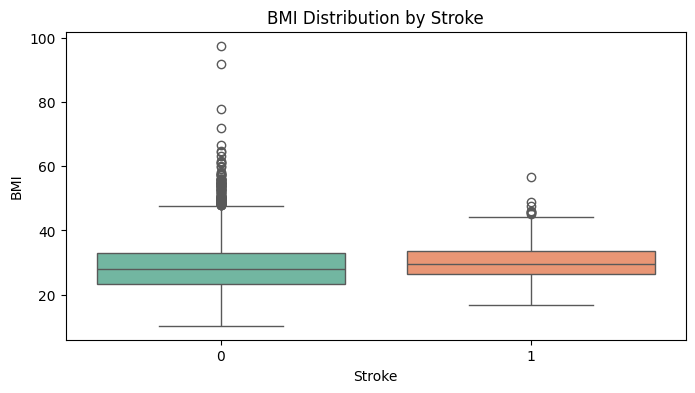

In [307]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_be, x='stroke', y='bmi', palette='Set2')
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

Based on the above, we can notice that individuals who are older with higher glucose level were more likely to have a stroke. Also, we notice that bmi index might not be significant indicator for probability of getting a stroke

In [308]:
df_be.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Encoding of dataset

  Enconding of Categorical features : Based on data type, we will use OneHotEncoder to avoid ordinalty assumptions. However, first column of each encoded feature will be dropped to reduce multicollinearity and reduce number of features

In [309]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_be['gender'] = label_encoder.fit_transform(df_be['gender'])
df_be['ever_married'] = label_encoder.fit_transform(df_be['ever_married'])
df_be['work_type'] = label_encoder.fit_transform(df_be['work_type'])
df_be['Residence_type'] = label_encoder.fit_transform(df_be['Residence_type'])
df_be['smoking_status'] = label_encoder.fit_transform(df_be['smoking_status'])
df = df_be

In [310]:
# categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# categorical_data = df_be[categorical_variables]
# encoder = OneHotEncoder(sparse_output = False, drop ='first')
# encoded_data = encoder.fit_transform(categorical_data)
# encoded_dataframe = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_variables))
# df = pd.concat([df_be.drop(columns=categorical_variables), encoded_dataframe], axis=1)
# df.head(5)

In [311]:
# df = pd.get_dummies(df_be, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True, dtype=int)
# df

In [312]:
df.shape

(4908, 11)

In [313]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [314]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


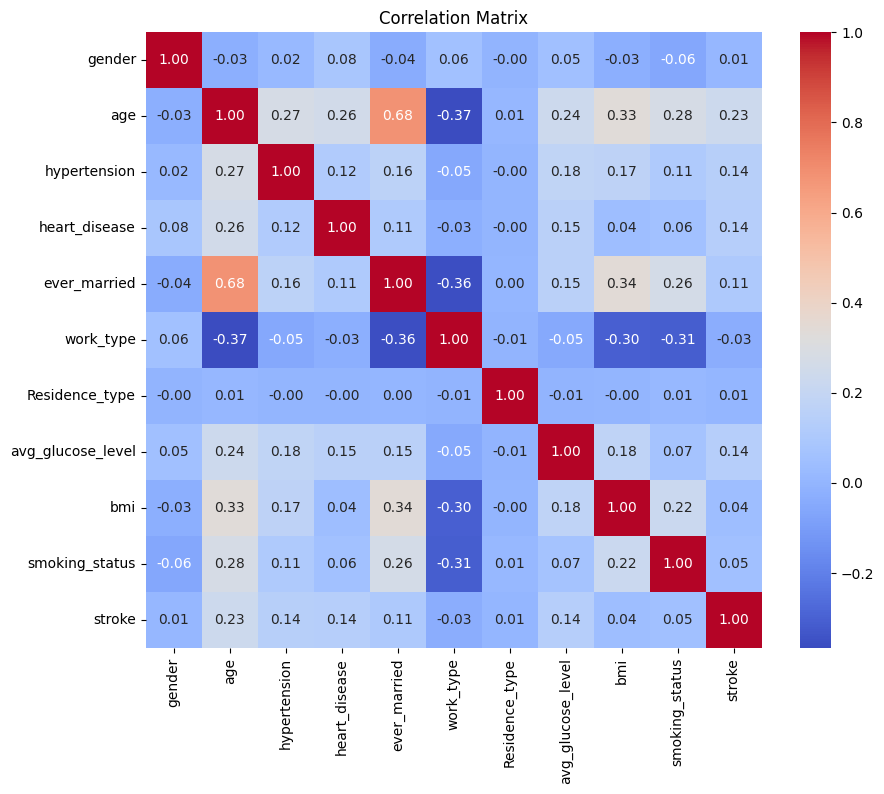

In [315]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

* Maybe we should consider dropping (work_type_children) as its highly correlated with age, ever_married ?? Conifrm with team

Features Relatioship with the output stroke

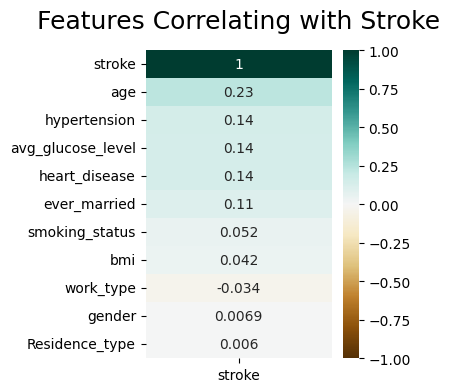

In [316]:
plt.figure(figsize=(3, 4))
heatmap = sns.heatmap(df.corr()[['stroke']].sort_values(by='stroke', key=abs, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Stroke', fontdict={'fontsize':18}, pad=16);

Based on the above understanding of the features we notice that : age, heart disease, average glucose level, hypertension ,and marriage status are the mostly influenced features with stroke. However, smoking status, gender are the least correlated to stroke.

Based on the correlation matrix, we determined that the 'work_type_children' column can be dropped as it is highly correlated with other independent variables (i.e., age, ever_married_Yes). In addition, further analysis showed that it is not strongly correlated with the output variable, 'stroke'. Therefore, dropping this column may reduce some of the multicollinearity and will not have an affect on accurately predicting the target variable.  

In [317]:
# df.drop(['work_type_children'], axis=1, inplace=True)

In [318]:
df.shape

(4908, 11)

## Outlier Detection

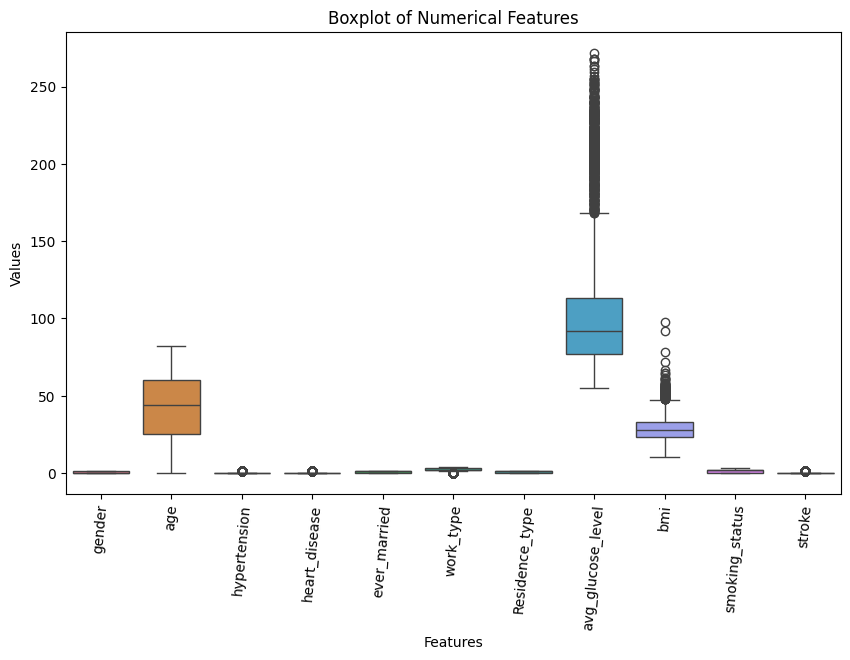

In [319]:
plt.figure(figsize = (10,6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=85)  # Rotate x-axis labels for better readability
plt.show()

## Handling Skewness

In [320]:
df.skew().sort_values(ascending=False)

stroke               4.532139
heart_disease        4.154536
hypertension         2.826403
avg_glucose_level    1.614619
bmi                  1.055063
gender               0.367186
Residence_type      -0.029352
smoking_status      -0.049154
age                 -0.119450
work_type           -0.302138
ever_married        -0.642160
dtype: float64

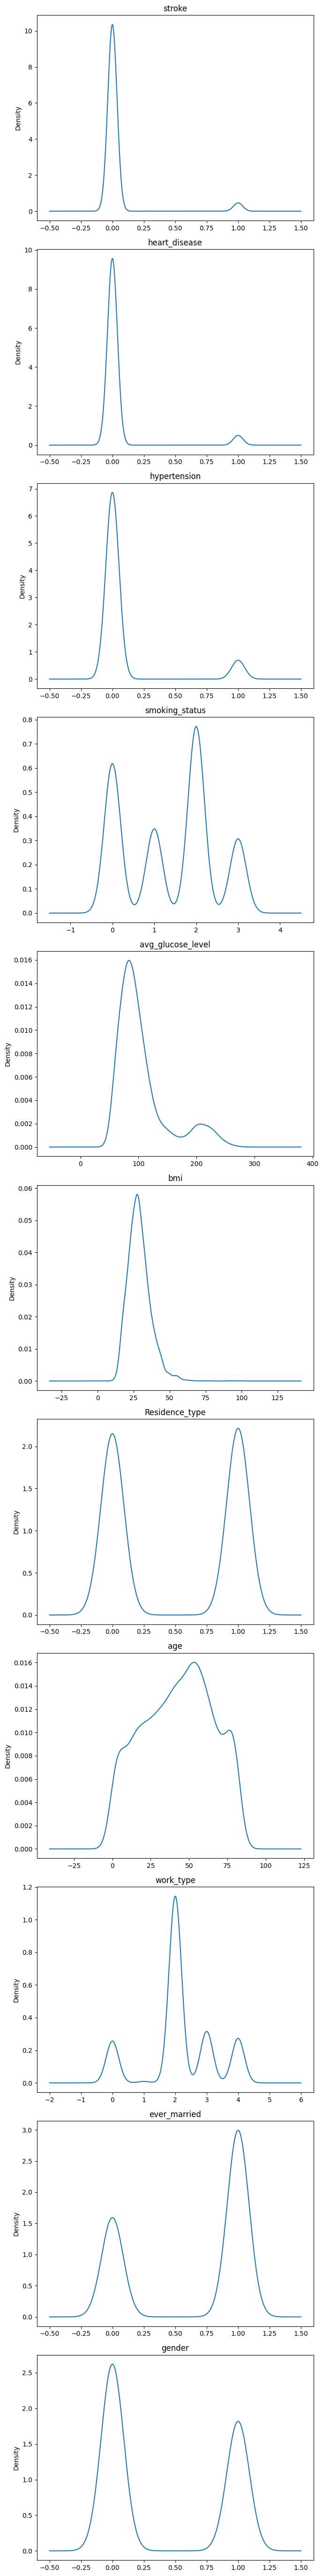

In [321]:
# Visualizing skewness for each attribute in the dataset
# List of parameters for density plot
parameters = ['stroke', 'heart_disease', 'hypertension', 'smoking_status',
              'avg_glucose_level', 'bmi', 'Residence_type', 'age', 'work_type', 'ever_married', 'gender']

# Create subplots
fig, axes = plt.subplots(len(parameters), 1, figsize=(7, 5 * len(parameters)))

# Loop through parameters and plot density plots
for i, param in enumerate(parameters):
    df[param].plot(kind='density', ax=axes[i])
    axes[i].set_title(param)

plt.tight_layout()
plt.show()

In [322]:
# List of attributes to analyze
attributes = ['stroke', 'heart_disease', 'hypertension', 'smoking_status',
              'avg_glucose_level', 'bmi', 'Residence_type', 'age', 'work_type', 'ever_married', 'gender']

# Dictionary to store skewness before and after transformations
skewness_results = {}

for attribute in attributes:
    try:
        # Display skewness before transformation
        attribute_skewness = df[attribute].skew()
        print(f"\nSkewness of '{attribute}': {attribute_skewness}")

        # Apply log transformation
        log_attribute = np.log1p(df[attribute])
        log_skewness = log_attribute.skew()
        print(f"Skewness after Log Transformation: {log_skewness}")

        # Apply sqrt transformation
        sqrt_attribute = df[attribute]**(1/2)
        sqrt_skewness = sqrt_attribute.skew()
        print(f"Skewness after Square Root Transformation: {sqrt_skewness}")

        # Apply reciprocal transformation
        reciprocal_attribute = 1 / df[attribute]
        reciprocal_skewness = reciprocal_attribute.skew()
        print(f"Skewness after Reciprocal Transformation: {reciprocal_skewness}")

        # Apply Box-Cox transformation
        bcx_attribute, _ = boxcox(df[attribute])
        bcx_skewness = pd.Series(bcx_attribute).skew()
        print(f"Skewness after Box-Cox Transformation: {bcx_skewness}")

        # Apply Yeo-Johnson transformation
        yf_attribute, _ = yeojohnson(df[attribute])
        yf_skewness = pd.Series(yf_attribute).skew()
        print(f"Skewness after Yeo-Johnson Transformation: {yf_skewness}")

        # Store skewness results in dictionary
        skewness_results[attribute] = {
            'Original': attribute_skewness,
            'Log': log_skewness,
            'Square Root': sqrt_skewness,
            'Reciprocal': reciprocal_skewness,
            'Box-Cox': bcx_skewness,
            'Yeo-Johnson': yf_skewness
        }
    except Exception as e:
        print(f"Error occurred while processing '{attribute}': {e}")


Skewness of 'stroke': 4.532139171602461
Skewness after Log Transformation: 4.532139171602462
Skewness after Square Root Transformation: 4.532139171602461
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'stroke': Data must be positive.

Skewness of 'heart_disease': 4.1545361240555865
Skewness after Log Transformation: 4.1545361240555865
Skewness after Square Root Transformation: 4.1545361240555865
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'heart_disease': Data must be positive.

Skewness of 'hypertension': 2.8264032194982986
Skewness after Log Transformation: 2.826403219498298
Skewness after Square Root Transformation: 2.8264032194982986
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'hypertension': Data must be positive.

Skewness of 'smoking_status': -0.04915375505149137
Skewness after Log Transformation: -0.4469999985727561
Skewness after Square Root Transformation: -0.5650612570680059
S

In [323]:
# ## Applying skewness from calculated
df['avg_glucose_level'], lambda_bc = boxcox(df['avg_glucose_level'])
df['bmi'], lambda_yj = yeojohnson(df['bmi'])

# df['avg_glucose_level'] = np.reciprocal(df['avg_glucose_level'])
# df['bmi'] = np.log(df['bmi'])

In [324]:
df.skew().sort_values(ascending=False)

stroke               4.532139
heart_disease        4.154536
hypertension         2.826403
gender               0.367186
avg_glucose_level    0.077869
bmi                 -0.000734
Residence_type      -0.029352
smoking_status      -0.049154
age                 -0.119450
work_type           -0.302138
ever_married        -0.642160
dtype: float64

## Label Selection

In [325]:
y = df['stroke']
x = df.drop('stroke',axis=1)

In [326]:
y.value_counts()

stroke
0    4699
1     209
Name: count, dtype: int64

## Data Splitting

In [327]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Handling Imbalance in target variable

In [328]:
train_df = pd.concat([x_train, y_train], axis=1)

In [329]:
train_df.to_excel('train_dataset.xlsx', index=False)

In [330]:
pip install imbalanced-learn

In [331]:
smote = SMOTE(random_state=42)

In [332]:
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [333]:
x_resampled_df = pd.DataFrame(x_train_resampled, columns=x.columns)
y_resampled_df = pd.DataFrame(y_train_resampled, columns=['stroke'])

In [334]:
balanced_train_df = pd.concat([x_resampled_df, y_resampled_df], axis=1)

In [335]:
balanced_train_df.to_excel('balanced_dataset.xlsx', index=False)

## Data Splitting after SMOTE

In [336]:
y_train = balanced_train_df['stroke']
x_train = balanced_train_df.drop('stroke', axis=1)

In [337]:
y_train.value_counts()

stroke
0    3770
1    3770
Name: count, dtype: int64

## Normalization

In [338]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [339]:
scaled_x_train.shape

(7540, 10)

In [340]:
y_train.shape

(7540,)

## Principle Component Analysis

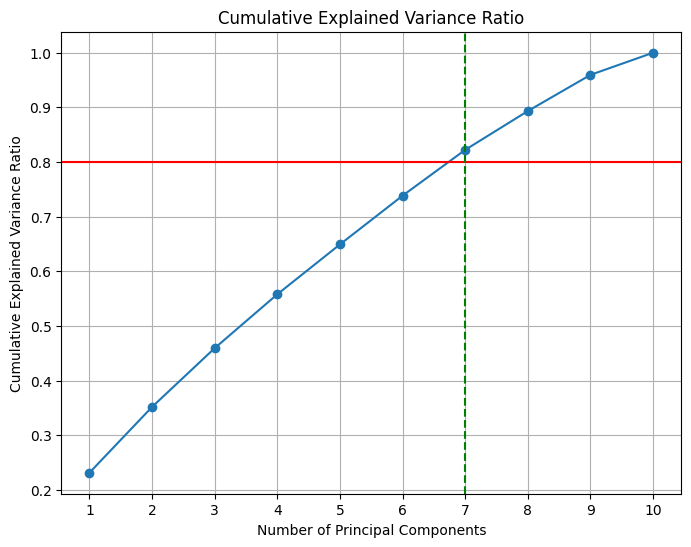

In [341]:
pca = PCA ()
pca.fit(scaled_x_train)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = np.arange(1, len(explained_variance_ratio) + 1)
index_80_percent = np.argmax(cumulative_variance_ratio >= 0.8) + 1

plt.figure(figsize=(8, 6))
plt.plot(n_components, cumulative_variance_ratio, marker='o', linestyle='-')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.axvline(x=index_80_percent, color='g', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.xticks(n_components)
plt.show()

In [342]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(scaled_x_train)
# X_val_pca = pca.fit_transform(scaled_x_val)
X_test_pca = pca.transform(scaled_x_test)

# Model Training

## Support Vector Machine

In [206]:
from sklearn.metrics import f1_score
svc = SVC(kernel='linear')
svc.fit(X_train_pca, y_train_resampled)
predicted_output = svc.predict(X_test_pca)
accuracy = metrics.accuracy_score(y_test, predicted_output) * 100
print("Accuracy:",accuracy,"%")

metrics_report = metrics.classification_report(y_test, predicted_output)
print(metrics_report)


Accuracy: 68.32993890020367 %
              precision    recall  f1-score   support

           0       0.98      0.68      0.80       929
           1       0.11      0.70      0.19        53

    accuracy                           0.68       982
   macro avg       0.54      0.69      0.50       982
weighted avg       0.93      0.68      0.77       982



[[634 295]
 [ 16  37]]
f1 score :  0.19220779220779222


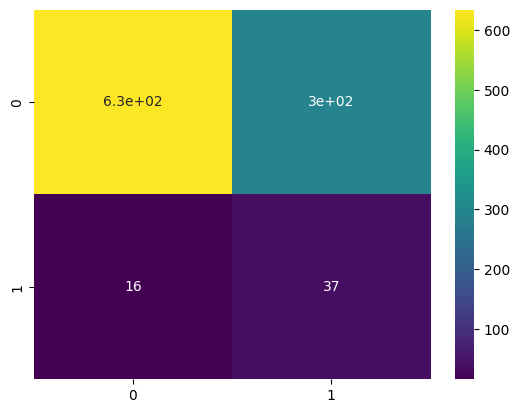

In [181]:
cmatrix = confusion_matrix(y_test,predicted_output)
print(cmatrix)

print("f1 score : ", f1_score(y_test, predicted_output))
sns.heatmap(confusion_matrix(y_test,predicted_output),cmap='viridis',annot=True);

AUC value is: 0.6902837297154578


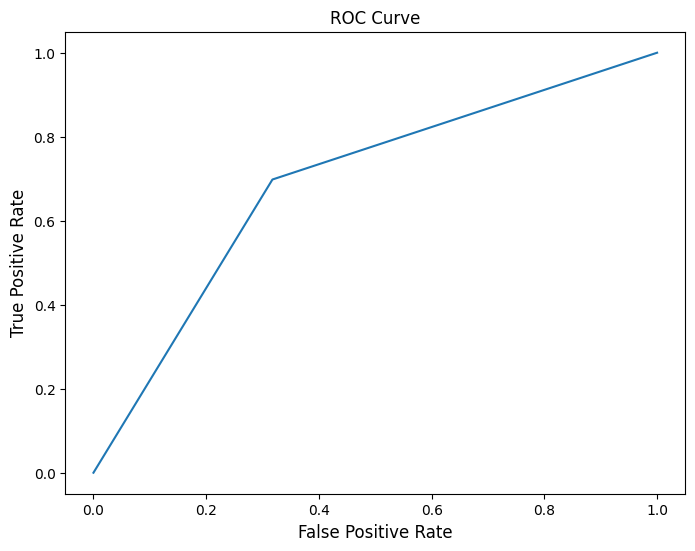

In [182]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predicted_output)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

## Logistic Regression

Accuracy: 70.16%
Confusion Matrix:
 [[653 276]
 [ 17  36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.70      0.82       929
           1       0.12      0.68      0.20        53

    accuracy                           0.70       982
   macro avg       0.55      0.69      0.51       982
weighted avg       0.93      0.70      0.78       982

f1 score :  0.19726027397260273


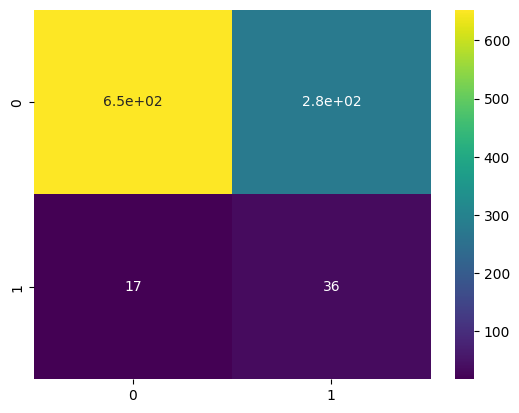

In [183]:


# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# fit the model with data
# logreg.fit(X_train_pca, y_train)
logreg.fit(X_train_pca, y_train_resampled)

# y_pred = logreg.predict(X_test_pca)
y_pred = logreg.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# print(cnf_matrix)

# metrics_report = metrics.classification_report(y_test, y_pred)
# print(metrics_report)

# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("f1 score : ", f1_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),cmap='viridis',annot=True);

AUC value is: 0.691075816966915


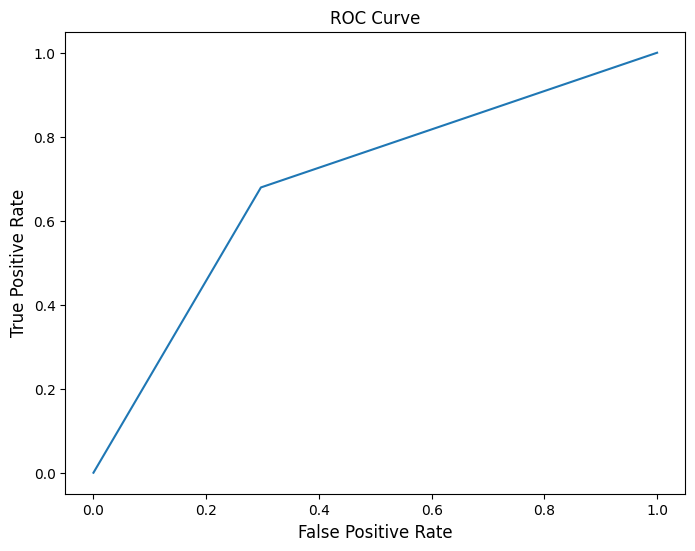

In [184]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

## Random Forest

Accuracy Score:  0.6079429735234216
Confusion Matrix:
 [[551 378]
 [  7  46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.59      0.74       929
           1       0.11      0.87      0.19        53

    accuracy                           0.61       982
   macro avg       0.55      0.73      0.47       982
weighted avg       0.94      0.61      0.71       982

f1 score :  0.1928721174004193
OOB Score: 0.7259946949602122
AUC value is: 0.7305177001035806


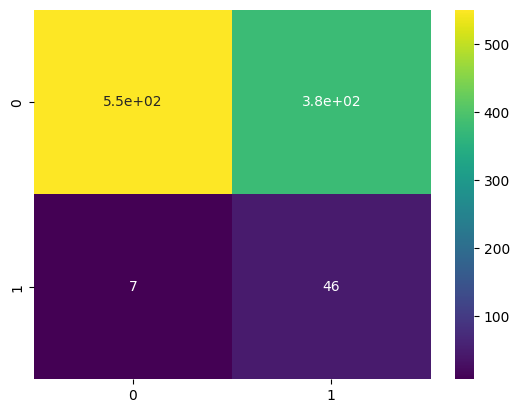

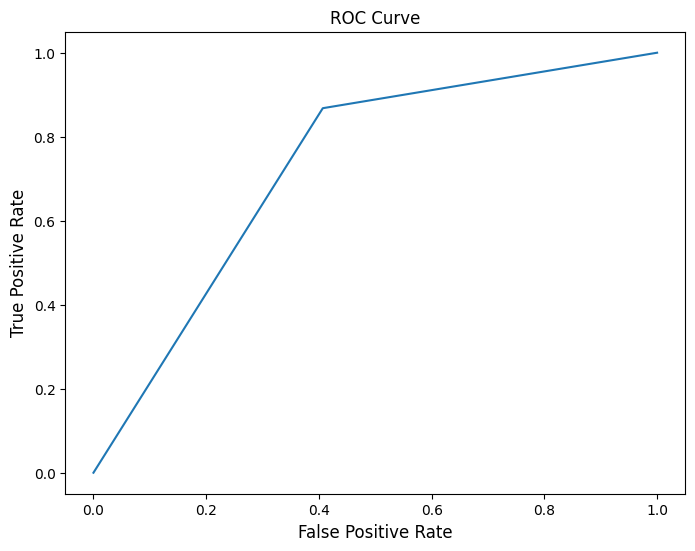

In [210]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=3,n_estimators=64,oob_score=True)
rfc.fit(X_train_pca,y_train_resampled)
rfc_tuned_pred = rfc.predict(X_test_pca)

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, rfc_tuned_pred))
print("\nClassification Report:\n", classification_report(y_test, rfc_tuned_pred))

print("f1 score : ", f1_score(y_test, rfc_tuned_pred))
print("OOB Score:", rfc.oob_score_)

sns.heatmap(confusion_matrix(y_test,rfc_tuned_pred),cmap='viridis',annot=True);

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, rfc_tuned_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)


In [211]:
feature_importances = rfc.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.78265745 0.0552163  0.00161775 0.02483486 0.01762447 0.10607748
 0.01197169]


              precision    recall  f1-score   support

           0       0.96      0.87      0.91       929
           1       0.12      0.30      0.17        53

    accuracy                           0.84       982
   macro avg       0.54      0.59      0.54       982
weighted avg       0.91      0.84      0.87       982

OOB Score: 0.8970822281167109
Accuracy Score:  0.8431771894093686
f1 score :  0.17204301075268819
AUC value is: 0.5879724597355647


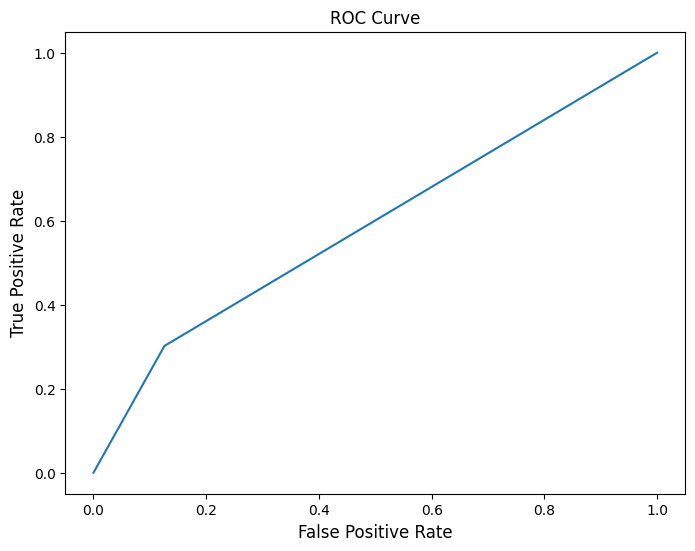

In [214]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=20,n_estimators=64, oob_score=True)
rfc.fit(X_train_pca,y_train_resampled)
rfc_tuned_pred = rfc.predict(X_test_pca)
print(metrics.classification_report(y_test,rfc_tuned_pred))
print("OOB Score:", rfc.oob_score_)
print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))
print("f1 score : ", f1_score(y_test, rfc_tuned_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, rfc_tuned_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)


              precision    recall  f1-score   support

           0       0.96      0.74      0.84       929
           1       0.10      0.49      0.16        53

    accuracy                           0.73       982
   macro avg       0.53      0.62      0.50       982
weighted avg       0.92      0.73      0.80       982

Accuracy Score:  0.730142566191446
f1 score :  0.16403785488958988
AUC value is: 0.617188293356622


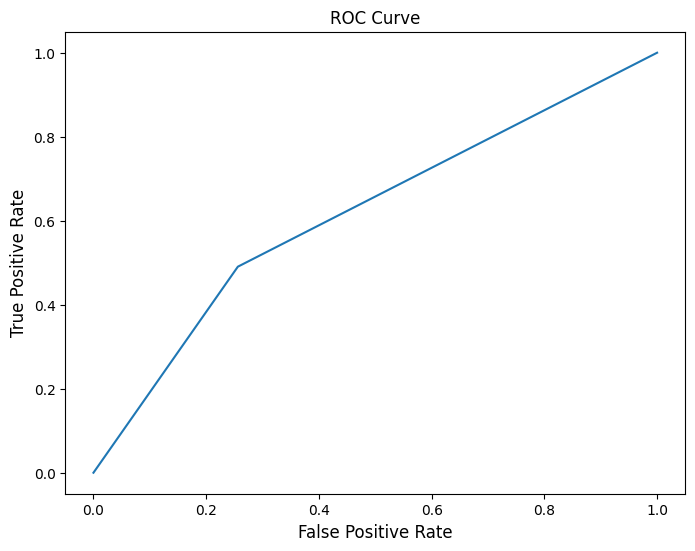

In [215]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=10,n_estimators=64,bootstrap=False)
rfc.fit(X_train_pca,y_train_resampled)
rfc_tuned_pred = rfc.predict(X_test_pca)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))

print("f1 score : ", f1_score(y_test, rfc_tuned_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, rfc_tuned_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)


              precision    recall  f1-score   support

           0       0.96      0.88      0.92       929
           1       0.12      0.28      0.17        53

    accuracy                           0.85       982
   macro avg       0.54      0.58      0.54       982
weighted avg       0.91      0.85      0.88       982

Accuracy Score:  0.8482688391038696
f1 score :  0.1675977653631285
AUC value is: 0.5817677762658163


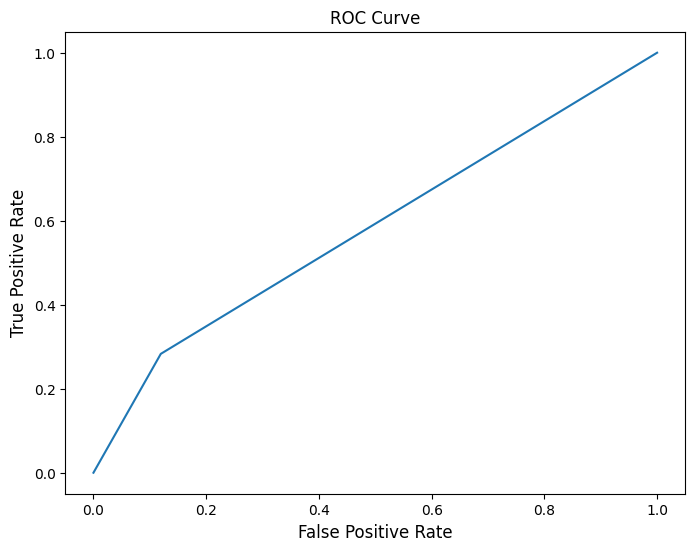

In [216]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features='sqrt',max_depth=15,n_estimators=32,bootstrap=False)
rfc.fit(X_train_pca,y_train_resampled)
rfc_tuned_pred = rfc.predict(X_test_pca)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))

print("f1 score : ", f1_score(y_test, rfc_tuned_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, rfc_tuned_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       929
           1       0.08      0.17      0.11        53

    accuracy                           0.85       982
   macro avg       0.51      0.53      0.51       982
weighted avg       0.90      0.85      0.87       982

Accuracy Score:  0.8503054989816701
OOB Score: 0.860079575596817
f1 score :  0.10909090909090909
AUC value is: 0.5294697077401141


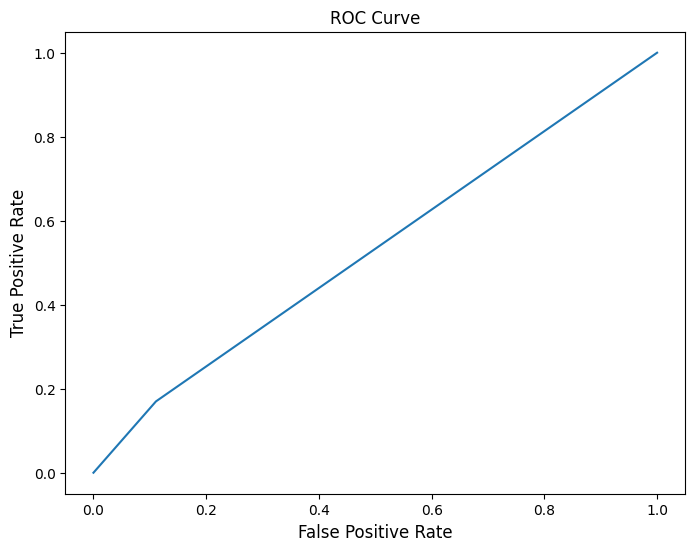

In [217]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features='log2',max_depth=None,n_estimators=10,oob_score=True)
rfc.fit(X_train_pca,y_train_resampled)
rfc_tuned_pred = rfc.predict(X_test_pca)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))
print("OOB Score:", rfc.oob_score_)

print("f1 score : ", f1_score(y_test, rfc_tuned_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, rfc_tuned_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

### Hyper parameter tuning for Random Foorest using Grid Search

In [374]:
# n_estimators =[64,100,128,200]
# max_features = ['sqrt','log2',2,3,5,7,20]
# oob_score = [True,False]
# max_depth = [3,7,10,15,20,30]
# criterion =['gini', 'entropy', 'log_loss']
# n_jobs =[1,-1]


# param_grid = {'n_estimators':n_estimators,
#              'max_features':max_features,
#              'oob_score':oob_score,
#               'max_depth':max_depth,
#               'criterion':criterion,
#               'n_jobs':n_jobs}

In [ ]:
# randomforest = RandomForestClassifier()

# grid = GridSearchCV(randomforest,param_grid,scoring='recall', cv=5)

# grid.fit(X_train_pca,y_train_resampled)
# grid.best_params_
# print("best_recall: ",grid.best_score_)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       960
           1       0.13      0.13      0.13        62

    accuracy                           0.90      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.89      0.90      0.89      1022

Accuracy Score:  89.53033268101761 %
[[907  53]
 [ 54   8]]


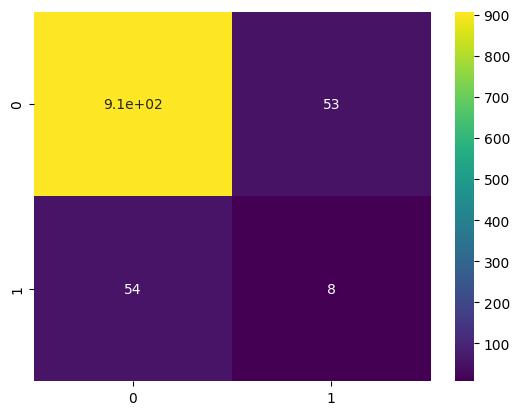

In [ ]:
# rfc = RandomForestClassifier(max_features=5,n_estimators=200,bootstrap=False, max_depth=20)
# rfc.fit(X_train_pca,y_train_resampled)

# rfc_tuned_pred = rfc.predict(X_test_pca)
# print(metrics.classification_report(y_test,rfc_tuned_pred))
# accuracy = accuracy_score(y_test,rfc_tuned_pred)
# print('Accuracy Score: ',accuracy*100,"%")

# cmatrix = confusion_matrix(y_test,rfc_tuned_pred)
# print(cmatrix)

# sns.heatmap(confusion_matrix(y_test,rfc_tuned_pred),cmap='viridis',annot=True);

AUC value is: 0.5374780368809812


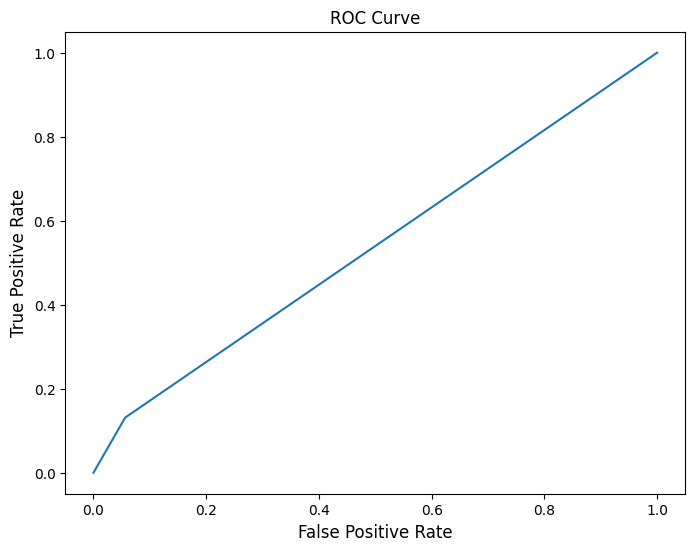

In [ ]:
# false_positive_rate, true_positive_rate, threshold = roc_curve(rfc_tuned_pred, y_test)
# plt.figure(figsize = (8, 6))
# plt.plot(false_positive_rate, true_positive_rate)
# plt.xlabel("False Positive Rate", size = 12)
# plt.ylabel("True Positive Rate", size = 12)
# plt.title("ROC Curve", size = 12)
# auc_value = auc(false_positive_rate, true_positive_rate)
# print("AUC value is:", auc_value)

## Naive Bayes

Accuracy for Gaussian is 60.9979633401222
Confusion Matrix:
 [[558 371]
 [ 12  41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.60      0.74       929
           1       0.10      0.77      0.18        53

    accuracy                           0.61       982
   macro avg       0.54      0.69      0.46       982
weighted avg       0.93      0.61      0.71       982

f1 score :  0.17634408602150536


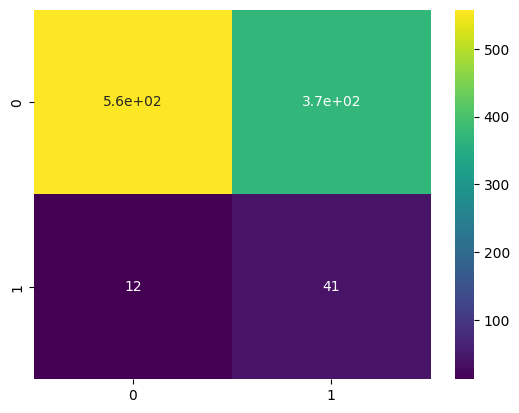

In [185]:
gaussian_model=GaussianNB()
gaussian_model.fit(X_train_pca, y_train_resampled)
predicted1 = gaussian_model.predict(X_test_pca)

print("Accuracy for Gaussian is",accuracy_score(y_test,predicted1)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted1))
print("\nClassification Report:\n", classification_report(y_test, predicted1))
print("f1 score : ", f1_score(y_test, predicted1))

sns.heatmap(confusion_matrix(y_test,predicted1),cmap='viridis',annot=True);

AUC value is: 0.687115380709629


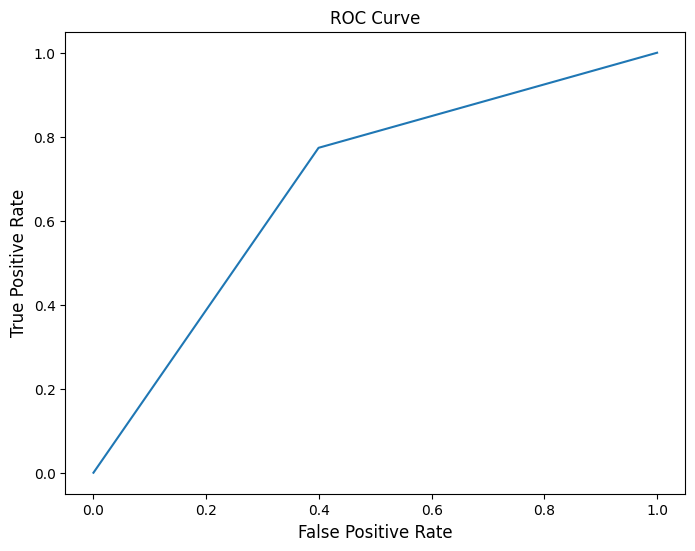

In [186]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predicted1)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

Accuracy for Bernoulli is 68.5336048879837
Confusion Matrix:
 [[637 292]
 [ 17  36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.69      0.80       929
           1       0.11      0.68      0.19        53

    accuracy                           0.69       982
   macro avg       0.54      0.68      0.50       982
weighted avg       0.93      0.69      0.77       982

f1 score :  0.18897637795275593


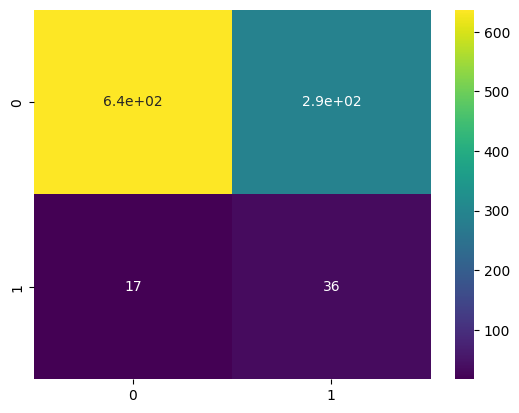

In [187]:
bernoulli_model=BernoulliNB()
bernoulli_model.fit(X_train_pca,y_train_resampled)
predicted2=bernoulli_model.predict(X_test_pca)
print("Accuracy for Bernoulli is",accuracy_score(y_test,predicted2)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted2))
print("\nClassification Report:\n", classification_report(y_test, predicted2))
print("f1 score : ", f1_score(y_test, predicted2))
sns.heatmap(confusion_matrix(y_test,predicted2),cmap='viridis',annot=True);

AUC value is: 0.6824644068485083


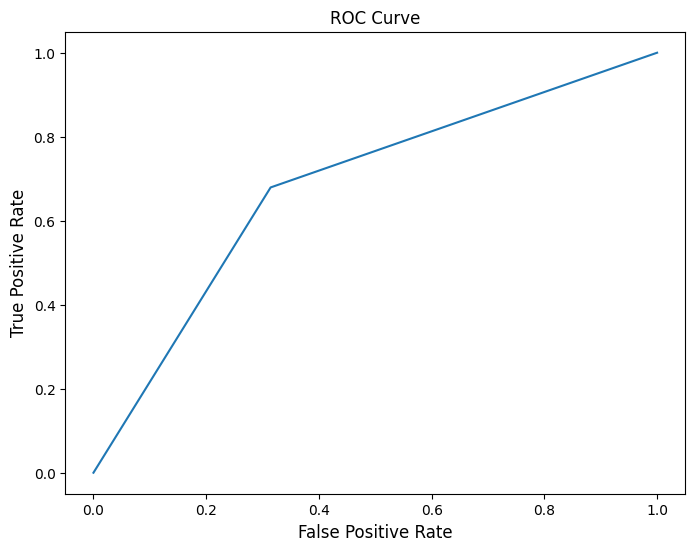

In [188]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predicted2)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

In [189]:
## ValueError: Negative values in data passed to MultinomialNB (input X)
# multinomial_model=MultinomialNB()
# multinomial_model.fit(scaled_x_train,y_train)
# predicted3=multinomial_model.predict(scaled_x_test)
# print("Accuracy for Multinomial is",accuracy_score(y_test,predicted3)*100)
# print("Confusion Matrix:\n", confusion_matrix(y_test, predicted3))
# print("\nClassification Report:\n", classification_report(y_test, predicted3))

# sns.heatmap(confusion_matrix(y_test,predicted3),cmap='viridis',annot=True);

## XGBoost

Accuracy: 0.6425661914460286
Confusion Matrix:
 [[584 345]
 [  6  47]]
f1 score :  0.21123595505617976
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.63      0.77       929
           1       0.12      0.89      0.21        53

    accuracy                           0.64       982
   macro avg       0.55      0.76      0.49       982
weighted avg       0.94      0.64      0.74       982

AUC value is: 0.7577126957369458


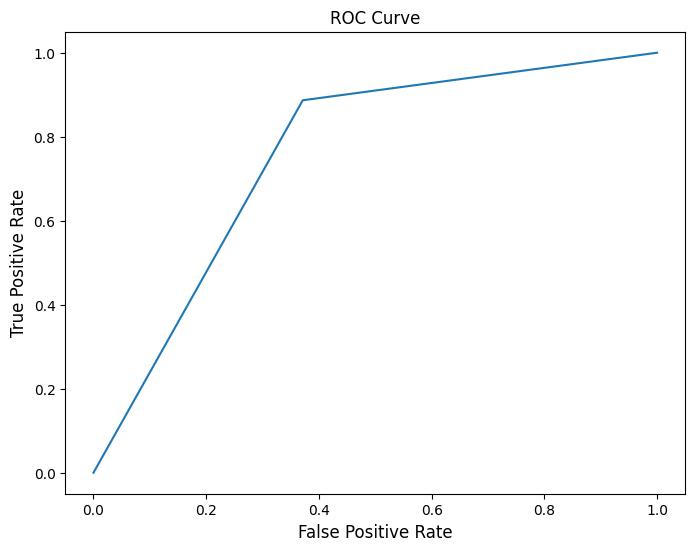

In [218]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=10, learning_rate=0.1, max_depth=3, random_state=42)
xgb_clf.fit(X_train_pca, y_train_resampled)
y_pred_boost = xgb_clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred_boost)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred_boost)
print("Confusion Matrix:\n", confusion_mat)

print("f1 score : ", f1_score(y_test, y_pred_boost))

class_report = classification_report(y_test, y_pred_boost)
print("Classification Report:\n", class_report)

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_boost)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

Accuracy: 0.6924643584521385
Confusion Matrix:
 [[642 287]
 [ 15  38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.69      0.81       929
           1       0.12      0.72      0.20        53

    accuracy                           0.69       982
   macro avg       0.55      0.70      0.51       982
weighted avg       0.93      0.69      0.78       982

f1 score :  0.20105820105820105
AUC value is: 0.7040233970388123


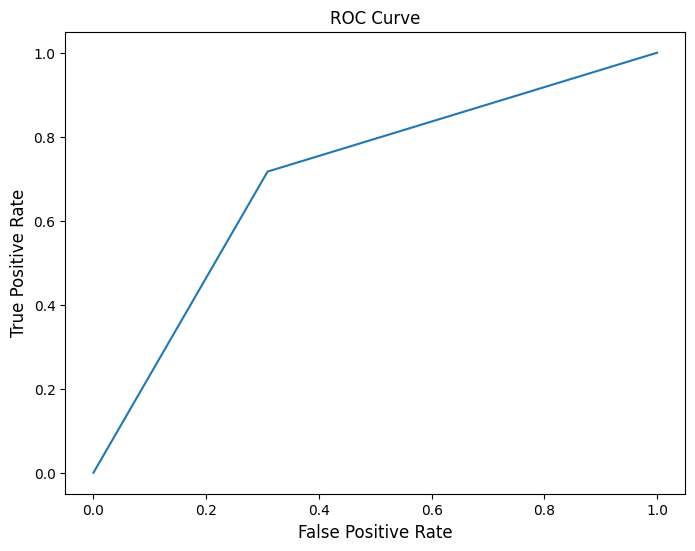

In [219]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=15, learning_rate=0.01, max_depth=5, random_state=42)
xgb_clf.fit(X_train_pca, y_train_resampled)
y_pred = xgb_clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


print("f1 score : ", f1_score(y_test, y_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

Accuracy: 0.7729124236252546
Confusion Matrix:
 [[731 198]
 [ 25  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87       929
           1       0.12      0.53      0.20        53

    accuracy                           0.77       982
   macro avg       0.55      0.66      0.53       982
weighted avg       0.92      0.77      0.83       982

f1 score :  0.2007168458781362
AUC value is: 0.6575847431809411


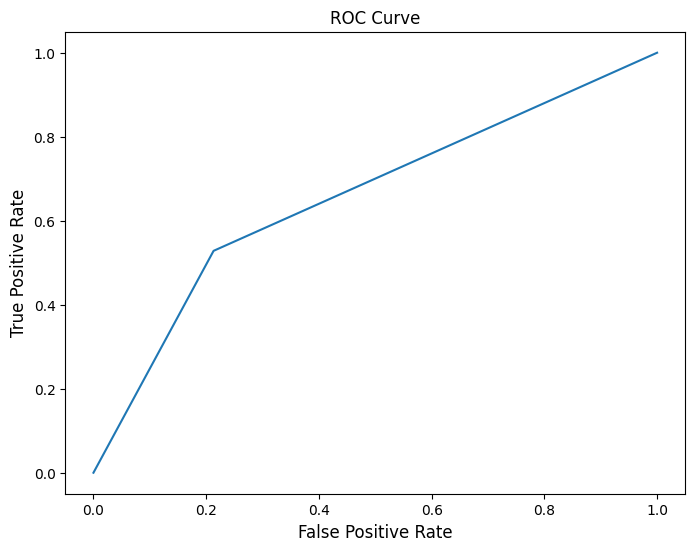

In [220]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=5, learning_rate=0.001, max_depth=10, random_state=42, subsample=0.5)
xgb_clf.fit(X_train_pca, y_train_resampled)
y_pred = xgb_clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

print("f1 score : ", f1_score(y_test, y_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

Accuracy: 0.7046843177189409
Confusion Matrix:
 [[654 275]
 [ 15  38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.70      0.82       929
           1       0.12      0.72      0.21        53

    accuracy                           0.70       982
   macro avg       0.55      0.71      0.51       982
weighted avg       0.93      0.70      0.79       982

f1 score :  0.20765027322404372
AUC value is: 0.7104819546276173


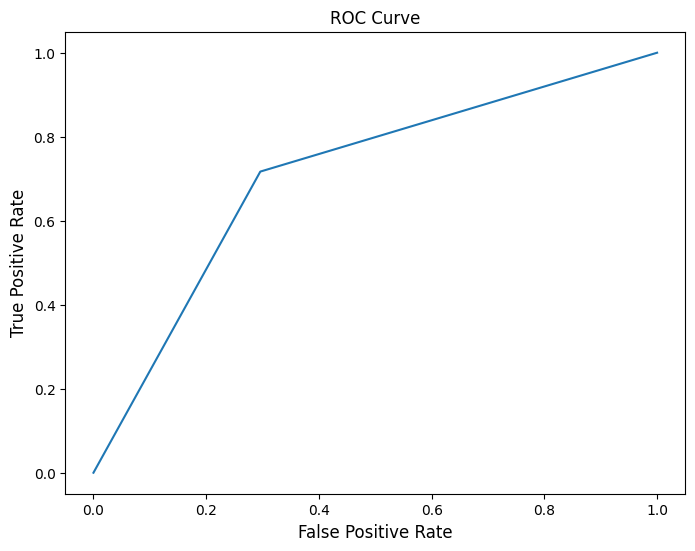

In [221]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=50, learning_rate=0.01, max_depth=5,max_features='sqrt',
                            validation_fraction =0.1, random_state=42)
xgb_clf.fit(X_train_pca, y_train_resampled)
y_pred = xgb_clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

print("f1 score : ", f1_score(y_test, y_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [10,20,50,100,300],  # Number of trees
    'max_depth': [3, 5, 7, None],           # Maximum depth of each tree
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'subsample': [0.8, 0.9, 1.0],     # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
}

# Create Grid Search CV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(scaled_x_train, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              learning_rate=best_params['learning_rate'],
                              subsample=best_params['subsample'],
                              colsample_bytree=best_params['colsample_bytree'])

# Fit the model on the training data
xgb_model.fit(scaled_x_train, y_train_resampled)

# Predict on the validation set
y_pred = xgb_model.predict(scaled_x_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate AUC-ROC score
y_pred_prob = xgb_model.predict_proba(scaled_x_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_prob)
print("AUC-ROC Score:", auc_roc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(auc_roc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Multi Layer Perceptron

# Validation Splitting

In [343]:
x_train, x_validation, y_train, y_validation = train_test_split(X_train_pca, y_train_resampled, test_size=0.1, random_state=42)

## Model 1

In [353]:
model = Sequential()
model.add(Dense(10, input_shape=(7,),activation = 'leaky_relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model and calculate its accuracy:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Print a summary of the Keras model:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                80        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [354]:
history = model.fit(x=x_train,y=y_train,validation_data=(x_validation,y_validation),batch_size = 64, epochs=200, verbose=1)

Epoch 1/200
107/107 [==============================] - 3s 6ms/step - loss: 0.6097 - accuracy: 0.6530 - val_loss: 0.5715 - val_accuracy: 0.7042
Epoch 2/200
107/107 [==============================] - 0s 4ms/step - loss: 0.5576 - accuracy: 0.7207 - val_loss: 0.5451 - val_accuracy: 0.7281
Epoch 3/200
107/107 [==============================] - 0s 3ms/step - loss: 0.5364 - accuracy: 0.7240 - val_loss: 0.5334 - val_accuracy: 0.7255
Epoch 4/200
107/107 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7215 - val_loss: 0.5278 - val_accuracy: 0.7228
Epoch 5/200
107/107 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.7207 - val_loss: 0.5253 - val_accuracy: 0.7241
Epoch 6/200
107/107 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7194 - val_loss: 0.5237 - val_accuracy: 0.7241
Epoch 7/200
107/107 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.7200 - val_loss: 0.5229 - val_accuracy: 0.7294

In [355]:

y_pred = model.predict(X_test_pca)
y_pred=(y_pred>0.5).astype(int)
print(confusion_matrix(y_pred,y_test))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Deep Learning Accuracy Score: ",accuracy)
print("Deep Learning Precision Score: ",precision)
print("Deep Learning Recall Score: ",recall)

31/31 [==============================] - 0s 1ms/step
[[703  23]
 [226  30]]
Deep Learning Accuracy Score:  0.7464358452138493
Deep Learning Precision Score:  0.1171875
Deep Learning Recall Score:  0.5660377358490566


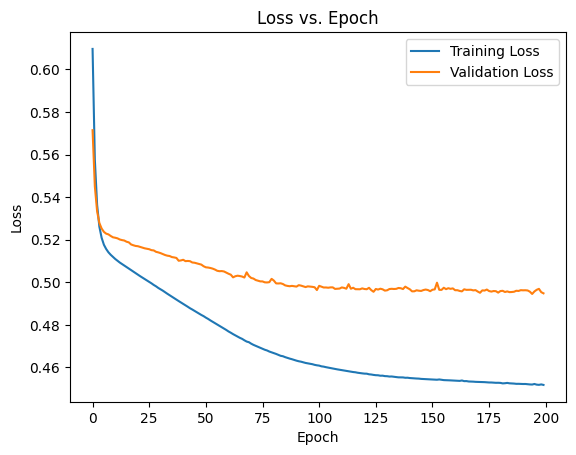

In [356]:
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

## Model 2

In [364]:

model_1 = Sequential()
model_1.add(Dense(12, input_shape=(7,),activation = 'leaky_relu'))
model_1.add(Dense(8,activation = 'leaky_relu'))
model_1.add(Dense(6,activation = 'leaky_relu'))
model_1.add(Dense(1, activation='sigmoid'))


# Compile the model and calculate its accuracy:
model_1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Print a summary of the Keras model:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 12)                96        
                                                                 
 dense_21 (Dense)            (None, 8)                 104       
                                                                 
 dense_22 (Dense)            (None, 6)                 54        
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [366]:
history_1 = model_1.fit(x=x_train,y=y_train,validation_data=(x_validation,y_validation),batch_size = 32, epochs=50, verbose=1)

y_pred = model_1.predict(X_test_pca)
y_pred=(y_pred>0.5).astype(int)
print(confusion_matrix(y_pred,y_test))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Deep Learning Accuracy Score: ",accuracy)
print("Deep Learning Precision Score: ",precision)
print("Deep Learning Recall Score: ",recall)

Epoch 1/50
213/213 [==============================] - 1s 3ms/step - loss: 0.4039 - accuracy: 0.8268 - val_loss: 0.4567 - val_accuracy: 0.7984
Epoch 2/50
213/213 [==============================] - 1s 3ms/step - loss: 0.4024 - accuracy: 0.8277 - val_loss: 0.4575 - val_accuracy: 0.7931
Epoch 3/50
213/213 [==============================] - 1s 3ms/step - loss: 0.4018 - accuracy: 0.8282 - val_loss: 0.4577 - val_accuracy: 0.7878
Epoch 4/50
213/213 [==============================] - 1s 2ms/step - loss: 0.4021 - accuracy: 0.8280 - val_loss: 0.4556 - val_accuracy: 0.7931
Epoch 5/50
213/213 [==============================] - 1s 3ms/step - loss: 0.4004 - accuracy: 0.8258 - val_loss: 0.4587 - val_accuracy: 0.7958
Epoch 6/50
213/213 [==============================] - 1s 3ms/step - loss: 0.3999 - accuracy: 0.8296 - val_loss: 0.4555 - val_accuracy: 0.7865
Epoch 7/50
213/213 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8270 - val_loss: 0.4549 - val_accuracy: 0.7865
Epoch 

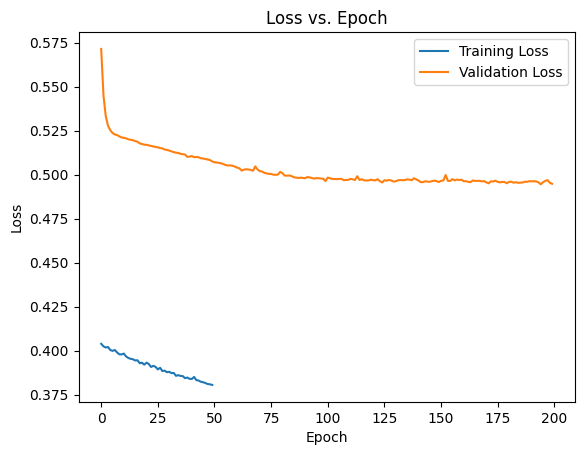

In [367]:
plt.plot(history_1.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

f1 score :  0.1758241758241758
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87       929
           1       0.11      0.45      0.18        53

    accuracy                           0.77       982
   macro avg       0.54      0.62      0.52       982
weighted avg       0.92      0.77      0.83       982

AUC value is: 0.6209253203891382


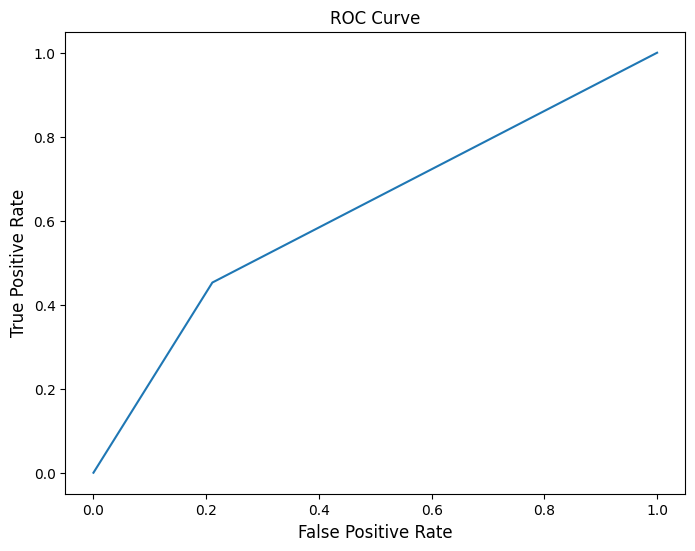

In [368]:
print("f1 score : ", f1_score(y_test, y_pred))

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

## Model 3

In [358]:
model_2 = Sequential()
model_2.add(Dense(12, input_shape=(7,),activation = 'relu'))
# model_1.add(Dense(12, input_shape=(14,),activation = 'leaky_relu'))
# model_1.add(Dense(6, input_shape=(14,),activation = 'leaky_relu'))
model_2.add(Dense(1, activation='sigmoid'))


# Compile the model and calculate its accuracy:
model_2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Print a summary of the Keras model:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 12)                96        
                                                                 
 dense_11 (Dense)            (None, 1)                 13        
                                                                 
Total params: 109 (436.00 Byte)
Trainable params: 109 (436.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [369]:
history_2 = model_2.fit(x=x_train,y=y_train,validation_data=(x_validation,y_validation),batch_size = 32, epochs=50, verbose=1)

y_pred = model_2.predict(X_test_pca)
y_pred=(y_pred>0.5).astype(int)
print(confusion_matrix(y_pred,y_test))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Deep Learning Accuracy Score: ",accuracy)
print("Deep Learning Precision Score: ",precision)
print("Deep Learning Recall Score: ",recall)

Epoch 1/50
213/213 [==============================] - 1s 4ms/step - loss: 0.4689 - accuracy: 0.7682 - val_loss: 0.5033 - val_accuracy: 0.7427
Epoch 2/50
213/213 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7678 - val_loss: 0.5034 - val_accuracy: 0.7440
Epoch 3/50
213/213 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.7686 - val_loss: 0.5044 - val_accuracy: 0.7401
Epoch 4/50
213/213 [==============================] - 0s 2ms/step - loss: 0.4678 - accuracy: 0.7685 - val_loss: 0.5027 - val_accuracy: 0.7440
Epoch 5/50
213/213 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7688 - val_loss: 0.5025 - val_accuracy: 0.7454
Epoch 6/50
213/213 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.7695 - val_loss: 0.5033 - val_accuracy: 0.7427
Epoch 7/50
213/213 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7685 - val_loss: 0.5021 - val_accuracy: 0.7480
Epoch 

f1 score :  0.17522658610271905
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.73      0.83       929
           1       0.10      0.55      0.18        53

    accuracy                           0.72       982
   macro avg       0.54      0.64      0.50       982
weighted avg       0.92      0.72      0.80       982

AUC value is: 0.6395698356926702


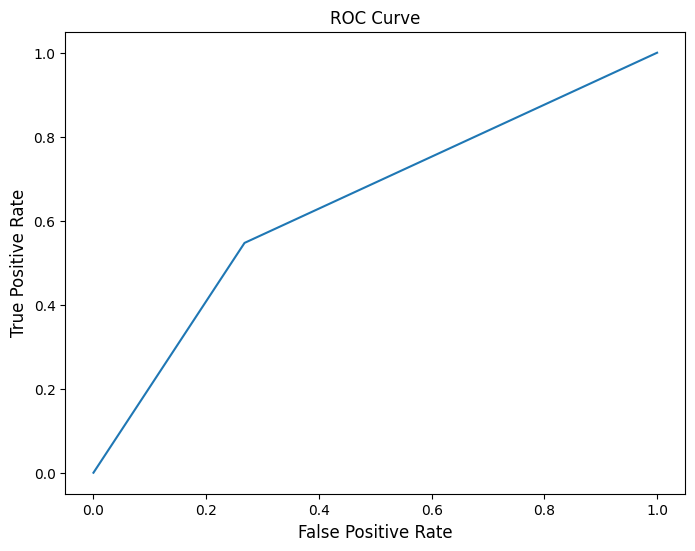

In [370]:
print("f1 score : ", f1_score(y_test, y_pred))

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

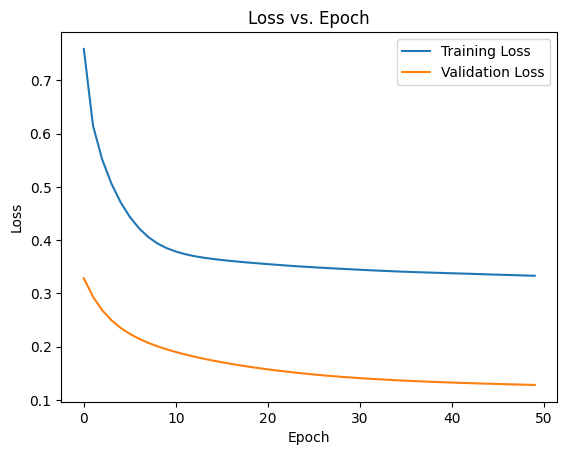

In [ ]:
plt.plot(history_2.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

## Grid search

In [ ]:
# Define a function to create the Keras model
# def create_model(optimizer='sgd'):
#     model = Sequential()
#     model.add(Dense(12, input_shape=(14,), activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     return model

# # Create a KerasClassifier based on your model function
# model = KerasClassifier(build_fn=create_model)

# # Define the grid search parameters
# param_grid = {
#     'batch_size': [10, 20, 40,50,60,70],
#     'epochs': [10, 50, 100],
#     'optimizer': ['sgd', 'adam']
# }

# # Create the GridSearchCV object
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# # Fit the grid search using your data
# grid_result = grid.fit(X_train, y_train)

# # Print the best parameters and accuracy
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


## MLP Classifier

In [266]:

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(14,8,4), max_iter=100,activation = 'relu',solver='adam',random_state=42, early_stopping= True,
                           verbose=False, validation_fraction=0.1, n_iter_no_change=10, tol=1e-4)




In [267]:
#Fitting the training data to the network
cls = classifier.fit(x_train, y_train)

#Predicting y for X_val
y_pred = cls.predict(X_test_pca)


In [268]:
cm = confusion_matrix(y_pred, y_test)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')

class_report = classification_report(y_pred, y_test)
print('Classification Report:')
print(class_report)

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:')
print(cm)

Accuracy: 0.7362525458248472
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       724
           1       0.49      0.10      0.17       258

    accuracy                           0.74       982
   macro avg       0.62      0.53      0.51       982
weighted avg       0.68      0.74      0.67       982

Confusion Matrix:
[[697  27]
 [232  26]]


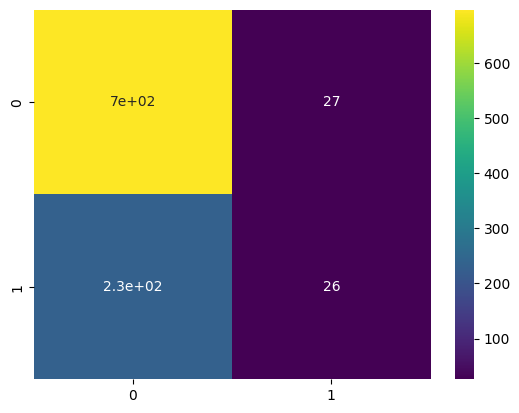

In [269]:
sns.heatmap(cm,cmap='viridis',annot=True);

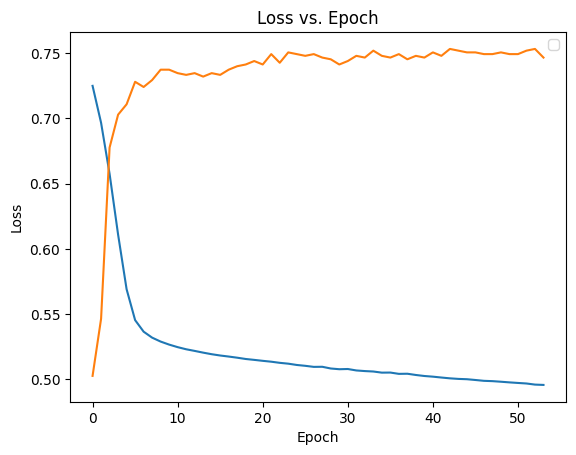

In [270]:
plt.plot(classifier.loss_curve_)
plt.plot(classifier.validation_scores_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

## MLP -2

Iteration 1, loss = 0.71693607
Validation score: 0.629973
Iteration 2, loss = 0.65051376
Validation score: 0.697613
Iteration 3, loss = 0.60632823
Validation score: 0.738727
Iteration 4, loss = 0.57579828
Validation score: 0.763926
Iteration 5, loss = 0.55256502
Validation score: 0.777188
Iteration 6, loss = 0.53337109
Validation score: 0.783820
Iteration 7, loss = 0.51629385
Validation score: 0.793103
Iteration 8, loss = 0.50181794
Validation score: 0.797082
Iteration 9, loss = 0.48950759
Validation score: 0.810345
Iteration 10, loss = 0.47869601
Validation score: 0.816976
Iteration 11, loss = 0.46967218
Validation score: 0.827586
Iteration 12, loss = 0.46197355
Validation score: 0.830239
Iteration 13, loss = 0.45536542
Validation score: 0.832891
Iteration 14, loss = 0.44966751
Validation score: 0.832891
Iteration 15, loss = 0.44475684
Validation score: 0.834218
Iteration 16, loss = 0.44042825
Validation score: 0.836870
Iteration 17, loss = 0.43671696
Validation score: 0.840849
Iterat

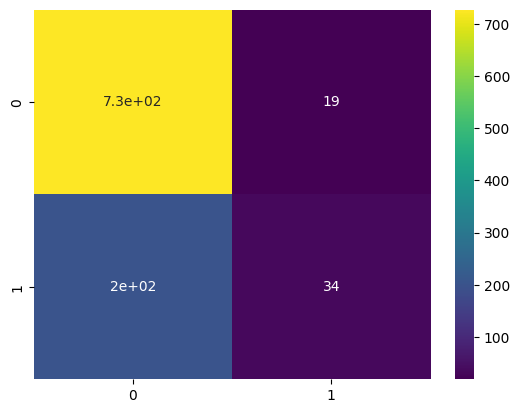

In [64]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(8), max_iter=100,activation = 'relu',solver='adam',random_state=42, early_stopping= True,
                           verbose=True, validation_fraction=0.1, n_iter_no_change=15, tol=1e-4)

#Fitting the training data to the network
cls = classifier.fit(scaled_x_train, y_train_resampled)

#Predicting y for X_val
y_pred = cls.predict(scaled_x_test)

cm = confusion_matrix(y_pred, y_test)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')

class_report = classification_report(y_pred, y_test)
print('Classification Report:')
print(class_report)

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:')
print(cm)

sns.heatmap(cm,cmap='viridis',annot=True);

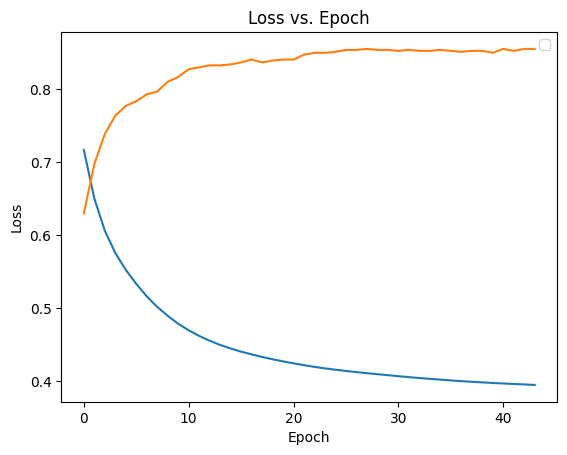

In [65]:
plt.plot(classifier.loss_curve_)
plt.plot(classifier.validation_scores_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

## MLP -3

Accuracy: 0.7922606924643585
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       787
           1       0.42      0.11      0.18       195

    accuracy                           0.79       982
   macro avg       0.61      0.54      0.53       982
weighted avg       0.73      0.79      0.74       982

Confusion Matrix:
[[756  31]
 [173  22]]


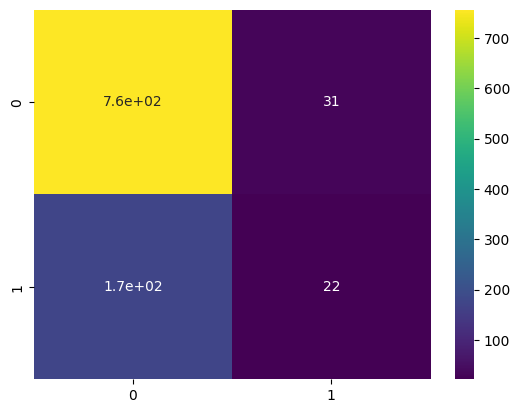

In [274]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(14,12,8), max_iter=100,activation = 'relu',solver='adam',random_state=42, early_stopping= True,
                           verbose=False, validation_fraction=0.1, n_iter_no_change=15, tol=1e-4)

#Fitting the training data to the network
cls = classifier.fit(scaled_x_train, y_train)

#Predicting y for X_val
y_pred = cls.predict(scaled_x_test)

cm = confusion_matrix(y_pred, y_test)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')

class_report = classification_report(y_pred, y_test)
print('Classification Report:')
print(class_report)

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:')
print(cm)

sns.heatmap(cm,cmap='viridis',annot=True);

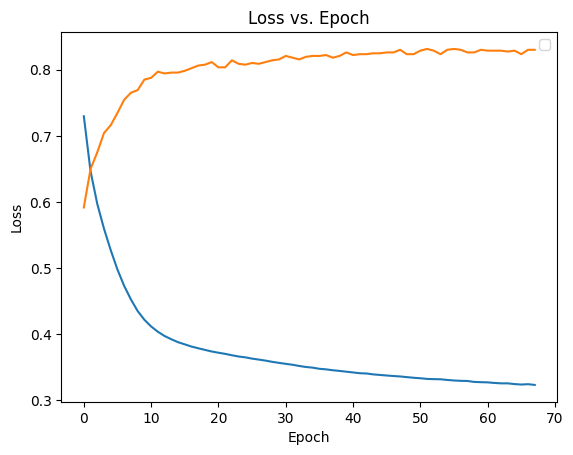

In [275]:
plt.plot(classifier.loss_curve_)
plt.plot(classifier.validation_scores_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

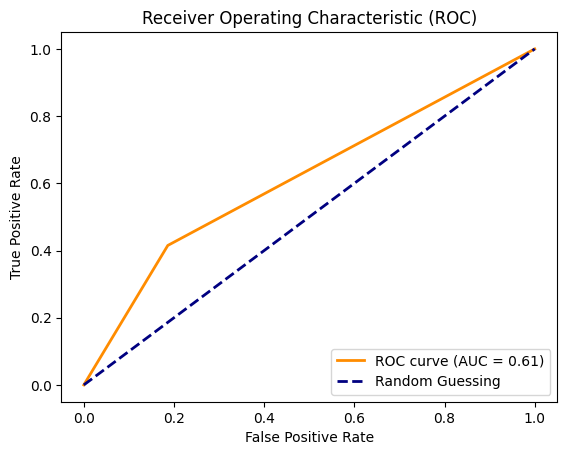

In [277]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Grid Search for MLP

In [ ]:
# #Initializing the MLPClassifier
# classifier = MLPClassifier(hidden_layer_sizes=(10,12,8), max_iter=100,activation = 'relu',solver='adam',random_state=42, early_stopping= True,
#                            verbose=False, validation_fraction=0.1, n_iter_no_change=15, tol=1e-4)

# #Fitting the training data to the network
# cls = classifier.fit(scaled_x_train, y_train)

# #Predicting y for X_val
# y_pred = cls.predict(scaled_x_test)

# cm = confusion_matrix(y_pred, y_test)

# accuracy = accuracy_score(y_pred, y_test)
# print(f'Accuracy: {accuracy}')

# class_report = classification_report(y_pred, y_test)
# print('Classification Report:')
# print(class_report)

# cm = confusion_matrix(y_pred, y_test)
# print('Confusion Matrix:')
# print(cm)

# sns.heatmap(cm,cmap='viridis',annot=True);

In [ ]:
# plt.plot(classifier.loss_curve_)
# plt.plot(classifier.validation_scores_)
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Loss vs. Epoch')
# plt.legend()
# plt.show()